In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("jam_axi_rms.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([9929]), array([8]))
-11.53099878220671


In [5]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([2122., 2191., 2164., 2312., 2171., 2191., 2074., 2124., 2081.,
       2083., 2156., 2187., 2309., 2241., 2246., 2168., 2263., 2069.,
       2106., 2014., 2053., 2152., 2226., 2248., 2161., 2130., 2046.,
       2179., 2225., 2198., 2109., 2177., 2268., 2136.,  135., 2227.,
       2211., 2214., 2120., 2113., 2352., 2344., 2294., 2150., 2115.,
       2165., 2085., 2325., 2129., 2128., 2113., 2286., 2242., 2235.,
       2178., 2133., 2017., 2272., 2249., 2124., 2199., 2204., 2314.,
       2185., 2249., 2285., 2242., 2132., 2155., 2273., 2109., 2327.,
       2216., 2269., 2290., 2120., 2118., 2236., 2232., 2285., 2216.,
       2067., 2162., 2175., 2207., 2150., 2254.,   47., 2115.,  157.,
       2303., 2187., 2180., 2304., 2313., 2166., 2202., 2146., 2034.,
       1866., 1977., 2222., 2128., 2118., 2286.,  175., 2150., 2066.,
       2108., 2107., 2120., 2298., 2269., 2180., 2136., 2269., 2183.,
       2200., 2039., 2325.])

[326.60188153 159.82393544 115.92688074 358.92313926]
flat chain shape: (1250640, 4)
flat log prob shape: (1250640,)


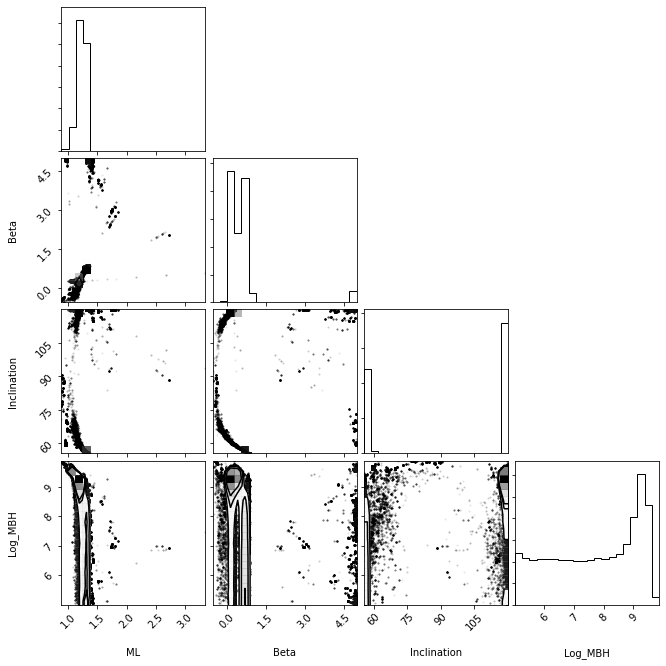

In [21]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob( flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels);

In [22]:
tau = read.get_autocorr_time()

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 208;
tau: [326.60188153 159.82393544 115.92688074 358.92313926]

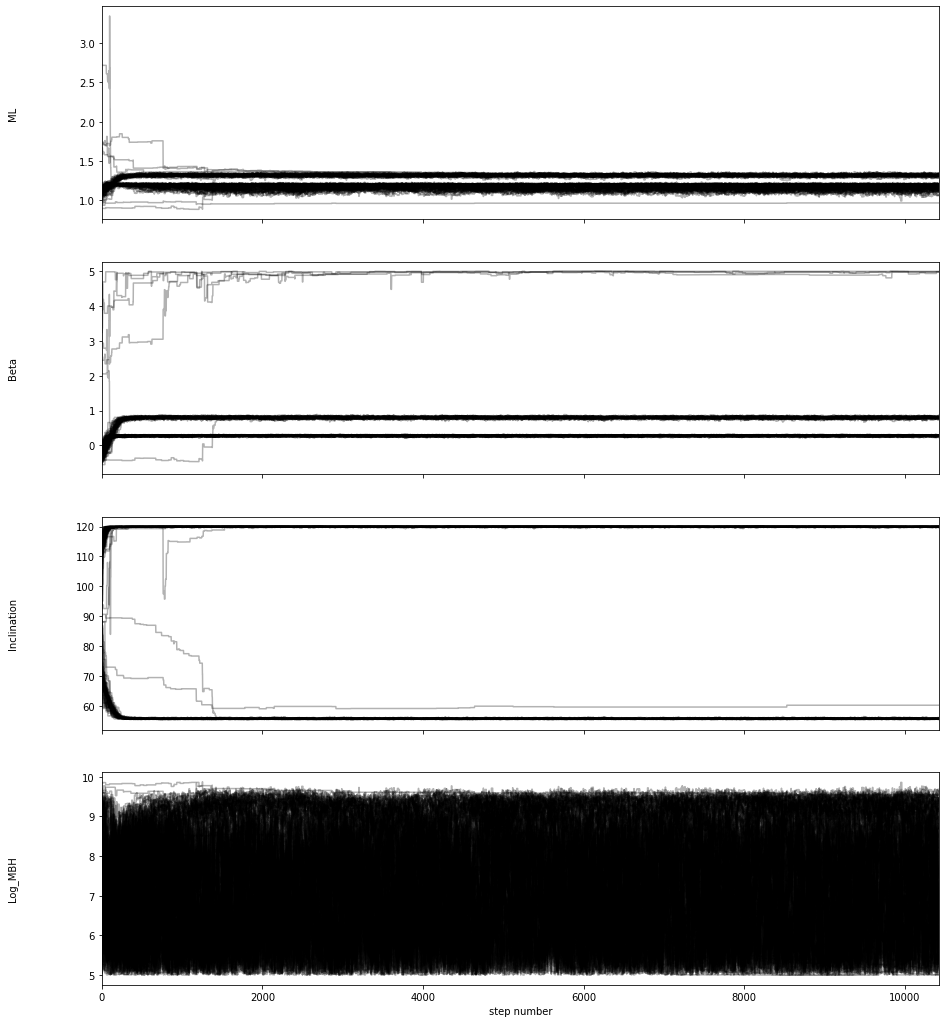

In [25]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [26]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

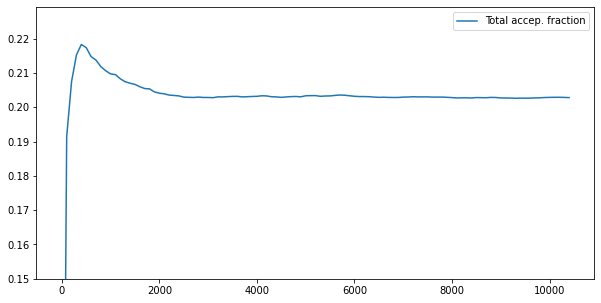

In [36]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.ylim(0.15,)
plt.legend()

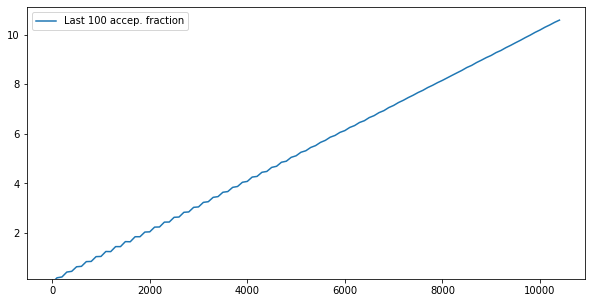

In [37]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()